![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [81]:
# Import Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [82]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [83]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

scaled_columns = list(penguins_df.columns[:4])
encoded_columns = ['sex']

scaled_penguins = scaler.fit_transform(penguins_df[scaled_columns])
encoded_penguins = encoder.fit_transform(penguins_df[encoded_columns])

processed_penguins_data = np.concatenate([scaled_penguins,encoded_penguins], axis=1)
processed_penguins_data

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.        ,
         1.        ],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.        ,
         0.        ],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.        ,
         0.        ],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.        ,
         1.        ],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.        ,
         0.        ],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.        ,
         1.        ]])

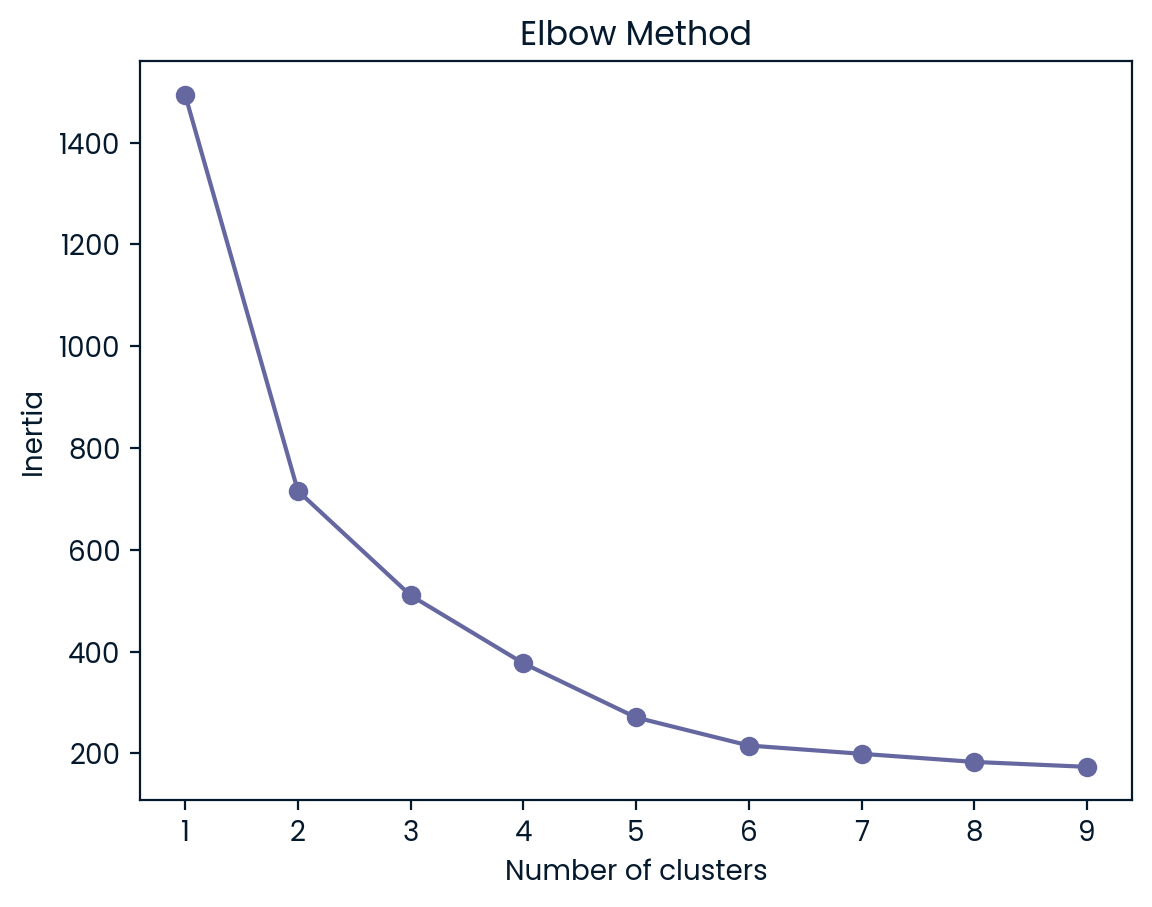

In [84]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(processed_penguins_data)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

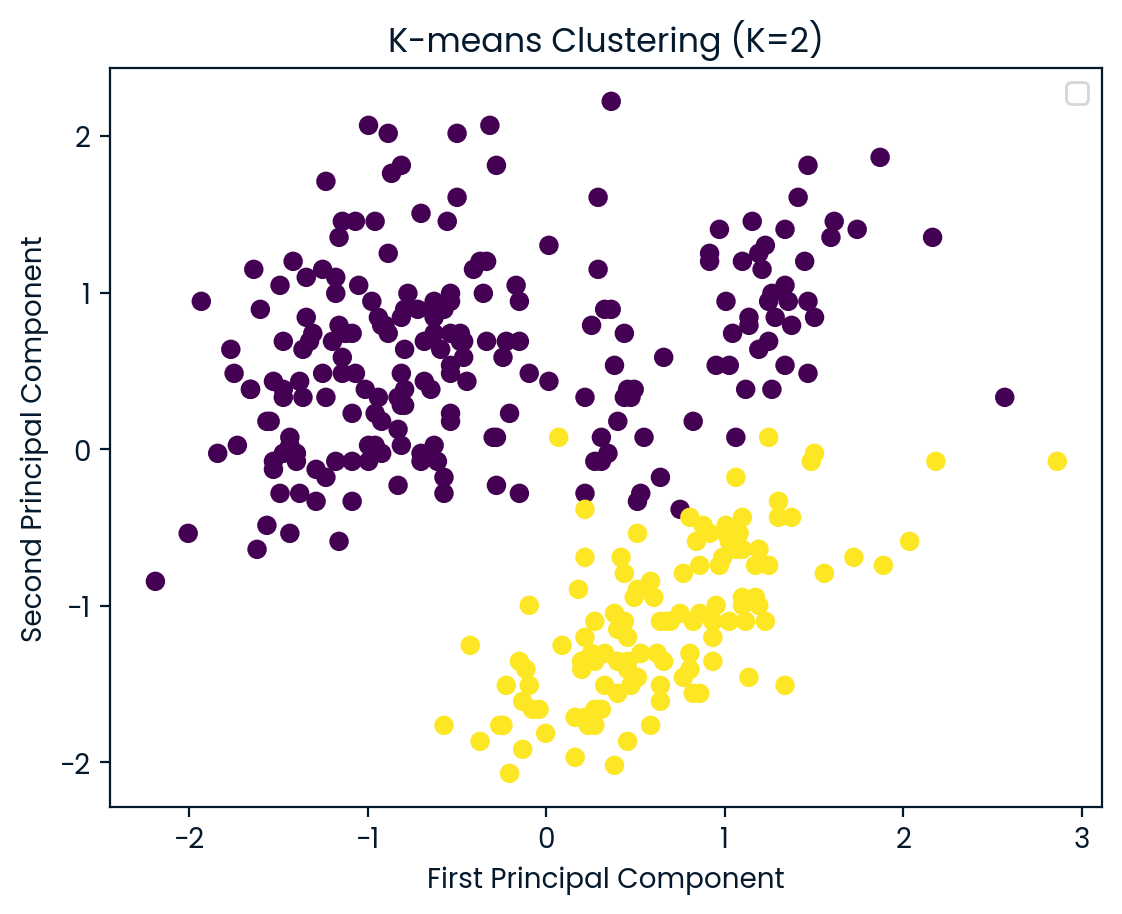

In [85]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
stat_penquings = kmeans.fit(processed_penguins_data)
plt.scatter(processed_penguins_data[:, 0], processed_penguins_data[:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [86]:
penguins_df['label'] = kmeans.labels_
stat_penguins = penguins_df.groupby('label')[scaled_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,42.039437,18.357746,191.892019,3711.502347
1,47.568067,14.996639,217.235294,5092.436975
